<a href="https://colab.research.google.com/github/HussamCheema/DermCNN/blob/master/DermCNNPart4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import applications

Using TensorFlow backend.


In [0]:
!git clone https://github.com/HussamCheema/DermCNN.git

Cloning into 'DermCNN'...
remote: Enumerating objects: 11369, done.
remote: Counting objects: 100% (11369/11369), done.
remote: Compressing objects: 100% (11369/11369), done.
remote: Total 11369 (delta 16), reused 11335 (delta 0), pack-reused 0
Receiving objects: 100% (11369/11369), 438.38 MiB | 13.65 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (11363/11363), done.


# Data Pre-Processing

In [0]:
data = []
labels = []

In [0]:
batch_size = 32
epochs = 10

In [0]:
for folder in range(1,8):
  for image in os.listdir(os.getcwd()+'/DermCNN/'+str(folder)+'/'):
    try:
      x = cv2.imread(os.getcwd()+'/DermCNN/'+str(folder)+'/'+image)
      x = cv2.resize(x, (150,150))
      data.append(x)
      labels.append(folder-1)
    except: pass


In [0]:
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))
print(data.shape)
print(labels.shape)

11355
11355
(11355, 150, 150, 3)
(11355,)


In [0]:
data = data.astype('float')
data /= 255
labels = keras.utils.to_categorical(labels, 7)
print(labels.shape)

(11355, 7)


#Shuffle Data


In [0]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [0]:
for i in range(10):
    shuffle(data,labels)

# Transfer Learning using GoogleNet Inception V3 Model

In [0]:
model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

In [0]:
#Here first 5 layers are not traiable but all other layers are traiable
for layer in model.layers[:5]:
    layer.trainable = False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

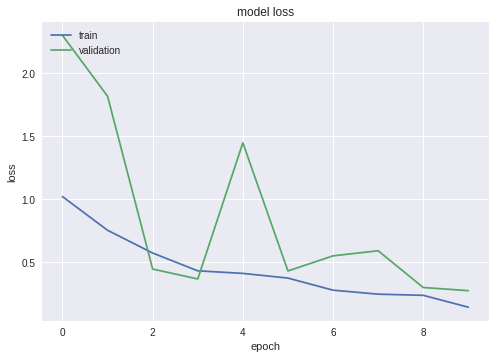

In [0]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
x = Dense(100,activation="relu")(x)
x = Dense(7,activation='softmax')(x)

# creating the final model 
model_final = Model(input = model.input, output = x)

model_final.summary()

model_final.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

X = model_final.fit(data,labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_split=0.3)

plt.plot(X.history['loss'])
plt.plot(X.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()